# Data preparation

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

Image preprocessing: *variant 2*

1) Alignement between panchromatic and SWIR



2) Image tiling 
For each training and label images: (image_ms_pan, image_swir_pan) ~ (3348, 3391, 16), label_image ~ (3348, 3391, 10)
- Divide into tiles with overlapping
- Apply transformations: flip, ... keras preprocessing
- Normalize to [0, 1] 
- Save to file

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import cv2 

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import sys
sys.path.append("../common/")

from data_utils import TRAIN_IMAGE_IDS, get_resized_polygons, generate_label_file, LABELS
from image_utils import generate_pansharpened, imwrite, get_filename, generate_aligned_swir
from visu_utils import display_img_1b
from geo_utils.GeoImage import GeoImage
from geo_utils.GeoImageTiler import GeoImageTiler

In [4]:
# image_id = TRAIN_IMAGE_IDS[0]

# tile_size = (512, 512)
# overlapping = 64

# # Generate pansharpened
# generate_pansharpened(image_id, 'ms')
# generate_pansharpened(image_id, 'swir')
# # Generate label image
# generate_label_file(image_id)

# gimg_pan = GeoImage(get_filename(image_id, 'pan'))
# gimg_ms = GeoImage(get_filename(image_id, 'ms_pan'))
# gimg_swir = GeoImage(get_filename(image_id, 'swir_pan'))
# gimg_label = GeoImage(get_filename(image_id, 'label'))

In [5]:
# gimg_pan_tiles = GeoImageTiler(gimg_pan, tile_size=tile_size, overlapping=overlapping, include_nodata=True, nodata_value=0.0)
# gimg_ms_tiles = GeoImageTiler(gimg_ms, tile_size=tile_size, overlapping=overlapping, include_nodata=True, nodata_value=0.0)
# gimg_swir_tiles = GeoImageTiler(gimg_swir, tile_size=tile_size, overlapping=overlapping, include_nodata=True, nodata_value=0.0)
# gimg_label_tiles = GeoImageTiler(gimg_label, tile_size=tile_size, overlapping=overlapping, include_nodata=True, nodata_value=0.0)

In [6]:
# tile_info_pan = gimg_pan_tiles.next()
# tile_info_ms = gimg_ms_tiles.next()
# tile_info_swir =gimg_swir_tiles.next()
# tile_info_label =gimg_label_tiles.next()

# tile_pan, xoffset_pan, yoffset_pan = tile_info_pan
# print tile_pan.shape
# tile_ms, xoffset_ms, yoffset_ms = tile_info_ms
# tile_swir, xoffset_swir, yoffset_swir = tile_info_swir
# tile_label, xoffset_label, yoffset_label = tile_info_label
# print tile_ms.shape, tile_swir.shape, tile_label.shape
# plt.figure(figsize=(12,8))
# plt.subplot(261)
# display_img_1b(tile_ms[:,:,2])
# plt.subplot(262)
# display_img_1b(tile_swir[:,:,2])
# for i in range(3,13):
#     plt.subplot(2,6,i)
#     display_img_1b(tile_label[:,:,i-3])
#     plt.title(LABELS[i-2])


In [7]:
import os
from image_utils import TRAIN_LABEL_TILES, TRAIN_TILES, get_tile_filename

In [10]:
tile_size = (512, 512)
overlapping = 64

for i, image_id in enumerate(TRAIN_IMAGE_IDS):
    print "--", image_id
    
    # Generate aligned swir file
    generate_aligned_swir(image_id)    
    
    # Generate pansharpened
    generate_pansharpened(image_id, 'ms')
    generate_pansharpened(image_id, 'swir_aligned')
    # Generate label image
    generate_label_file(image_id)

    gimg_pan = GeoImage(get_filename(image_id, 'pan'))
    gimg_ms = GeoImage(get_filename(image_id, 'ms_pan'))
    gimg_swir = GeoImage(get_filename(image_id, 'swir_pan'))
    gimg_label = GeoImage(get_filename(image_id, 'label'))
    
    gimg_pan_tiles = GeoImageTiler(gimg_pan, tile_size=tile_size, overlapping=overlapping, include_nodata=True, nodata_value=0.0)
    gimg_ms_tiles = GeoImageTiler(gimg_ms, tile_size=tile_size, overlapping=overlapping, include_nodata=True, nodata_value=0.0)
    gimg_swir_tiles = GeoImageTiler(gimg_swir, tile_size=tile_size, overlapping=overlapping, include_nodata=True, nodata_value=0.0)
    gimg_label_tiles = GeoImageTiler(gimg_label, tile_size=tile_size, overlapping=overlapping, include_nodata=True, nodata_value=0.0)
    
    for tile_info_pan, tile_info_ms, tile_info_swir, tile_info_label in \
            zip(gimg_pan_tiles, gimg_ms_tiles, gimg_swir_tiles, gimg_label_tiles):
    
        tile_pan, xoffset_pan, yoffset_pan = tile_info_pan
        tile_ms, xoffset_ms, yoffset_ms = tile_info_ms
        tile_swir, xoffset_swir, yoffset_swir = tile_info_swir
        tile_label, xoffset_label, yoffset_label = tile_info_label

        h, w, _ = tile_pan.shape
        x = np.zeros((h, w, 17), dtype=np.uint16)
        x[:,:,0] = tile_pan[:,:,0]; x[:,:,1:9] = tile_ms; x[:,:,9:] = tile_swir
        imwrite(get_tile_filename(image_id, xoffset_ms, yoffset_ms, '17b'), x)
        y = tile_label
        imwrite(get_tile_filename(image_id, xoffset_label, yoffset_label, 'label'), y)    

-- 6040_2_2
-- 6120_2_2
-- 6120_2_0
-- 6090_2_0
-- 6040_1_3
-- 6040_1_0
-- 6100_1_3
-- 6010_4_2
-- 6110_4_0
-- 6140_3_1
-- 6110_1_2
-- 6100_2_3
-- 6150_2_3
-- 6160_2_1
-- 6140_1_2
-- 6110_3_1
-- 6010_4_4
-- 6170_2_4
-- 6170_4_1
-- 6170_0_4
-- 6060_2_3
-- 6070_2_3
-- 6010_1_2
-- 6040_4_4
-- 6100_2_2


In [11]:
gimg_test = GeoImage(TRAIN_TILES + '/6040_2_2_-64_-64.tif')
img = gimg_test.get_data()
print img.shape, img.dtype

(512, 512, 17) uint16


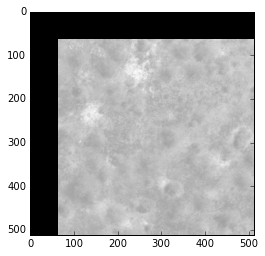

In [12]:
nimg = img * 1.0/2**12
plt.figure()
plt.imshow(nimg[:,:,0], cmap='gray')

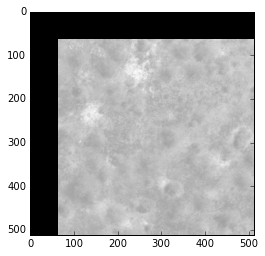

In [13]:
from image_utils import get_image_tile_data

img = get_image_tile_data(TRAIN_TILES + '/6040_2_2_-64_-64.tif')

nimg = img * 1.0/2**12
plt.figure()
plt.imshow(nimg[:,:,0], cmap='gray')

In [14]:
from image_utils import get_image_data
label_img = get_image_data("6100_2_2", 'label')
label_img.shape

(3348, 3391, 11)

In [9]:

def normalize_image(img_data, interp=cv2.INTER_CUBIC):
    img_data = cv2.resize(img_data, dsize=(512, 512), interpolation=interp)
    out = np.zeros_like(img_data)
    for c in range(img_data.shape[2]):        
        min_value, max_value, _, _ = cv2.minMaxLoc(img_data[:,:,c])
        out[:,:,c] = (img_data[:,:,c] - min_value)/(max_value - min_value + 0.0001)            
    out = out.transpose([2,0,1])
    out = out[None,:]
    return out